In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Task 1: Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
# Fundamental data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
 # Check for missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

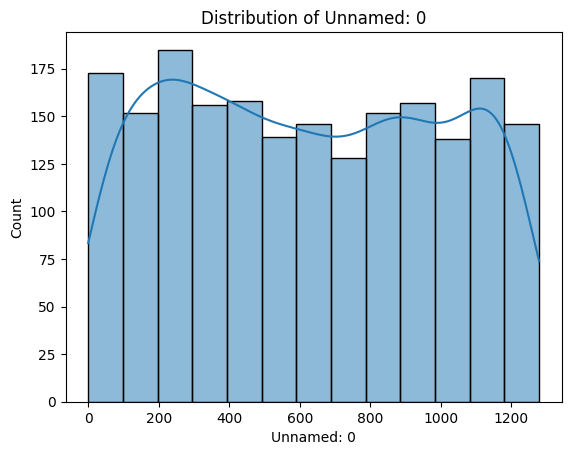

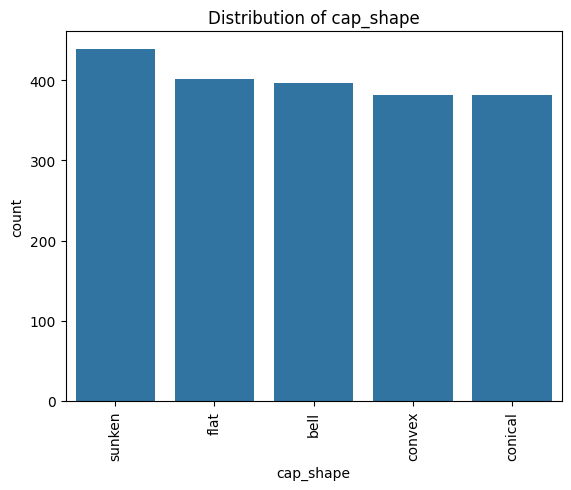

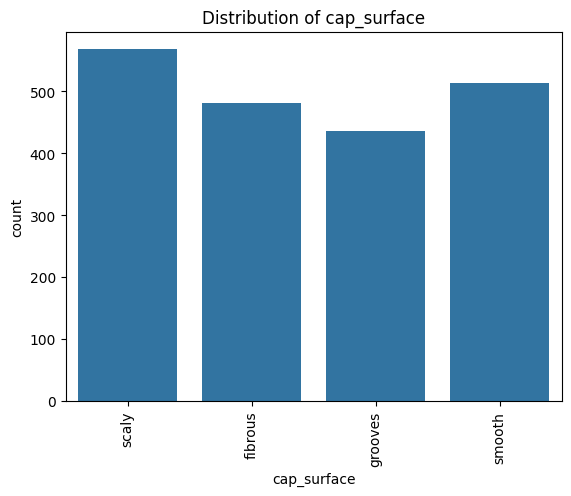

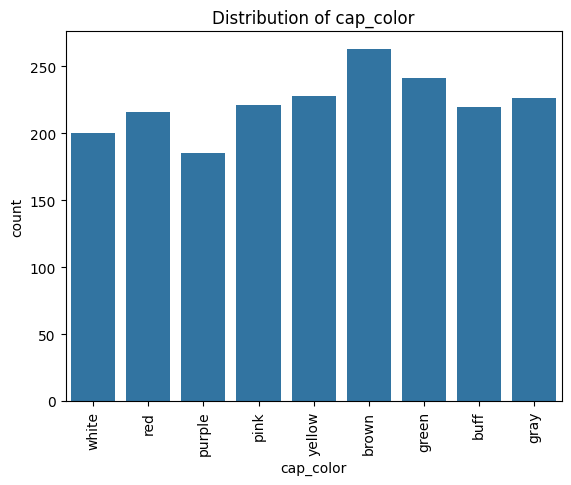

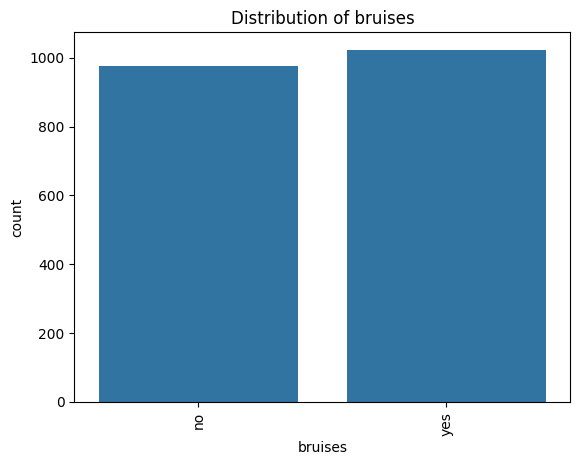

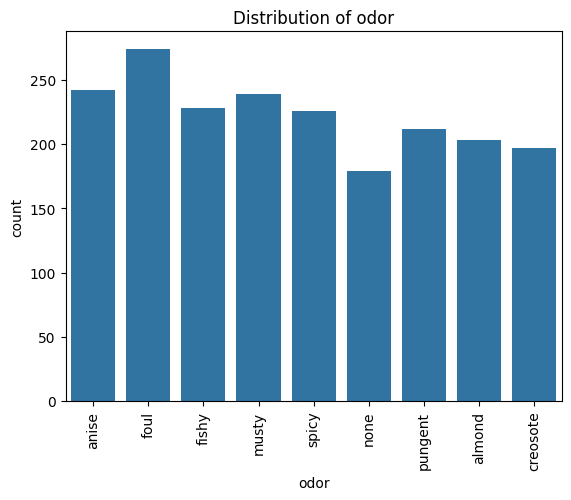

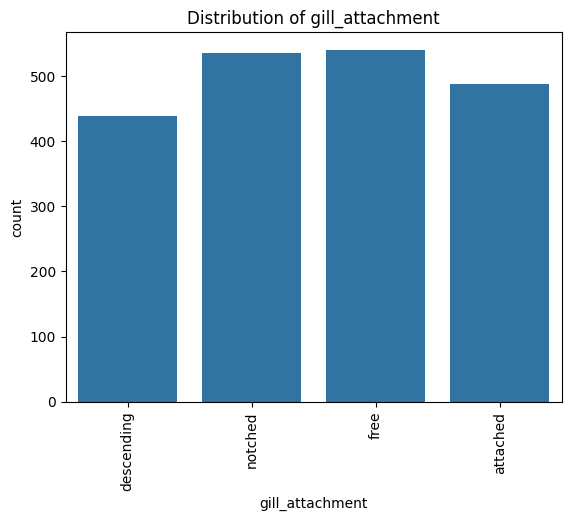

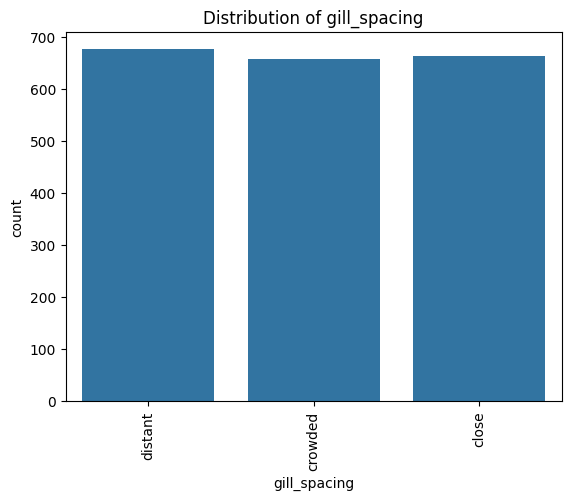

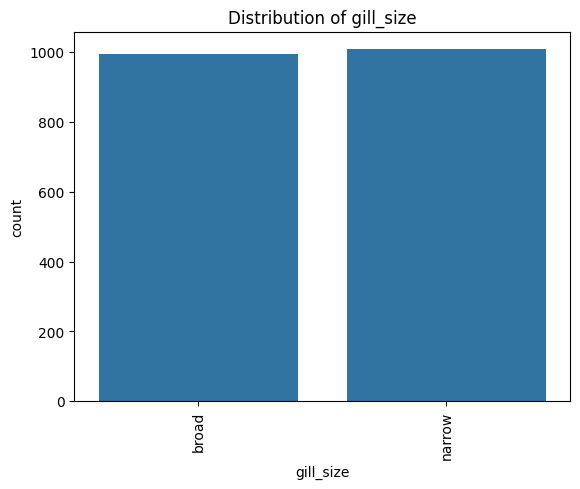

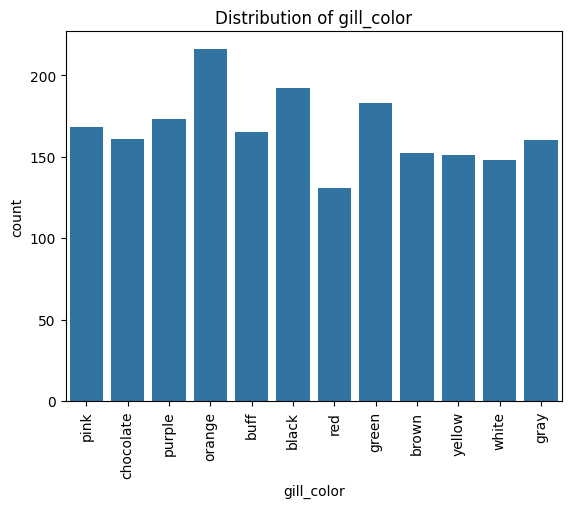

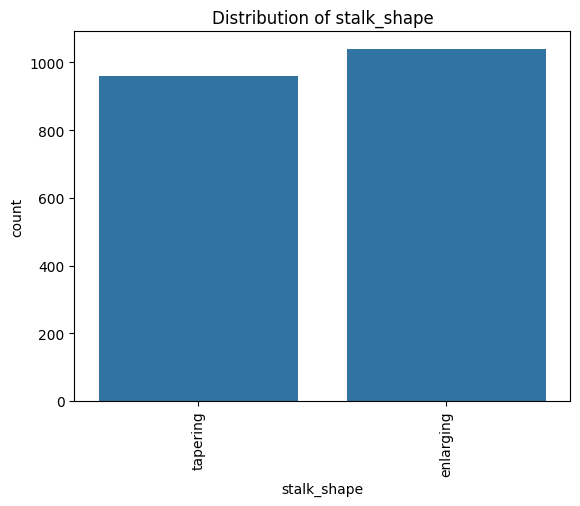

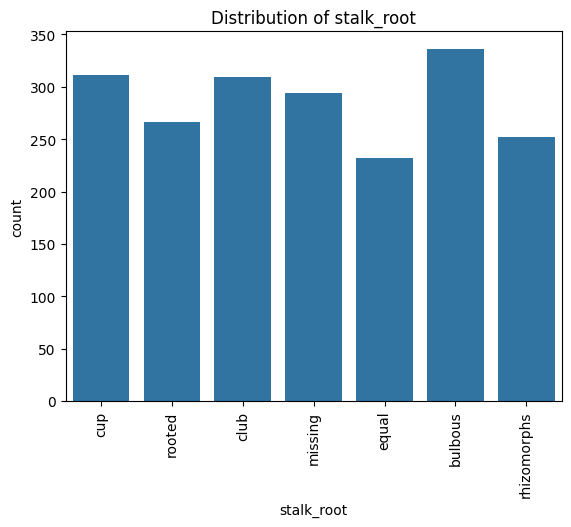

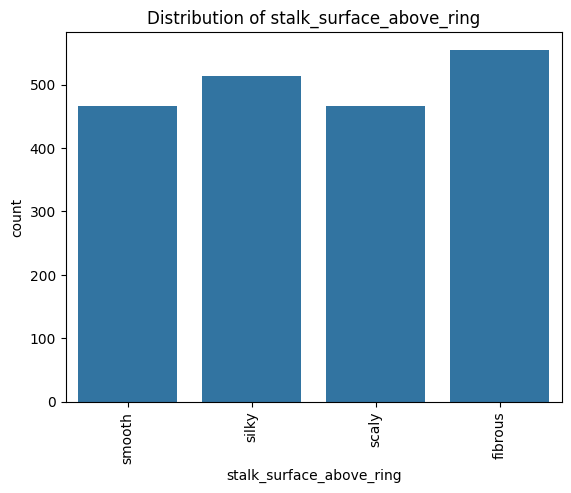

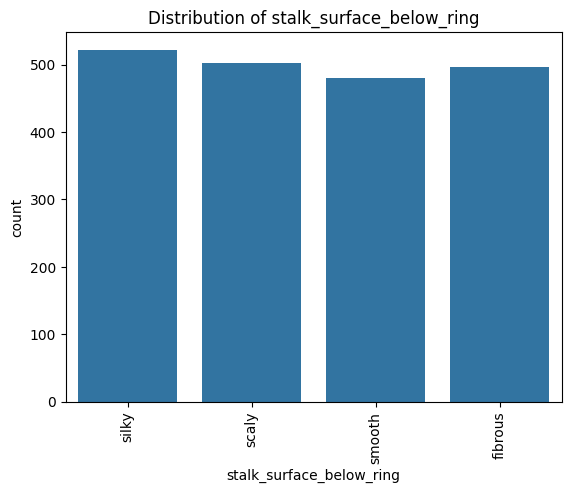

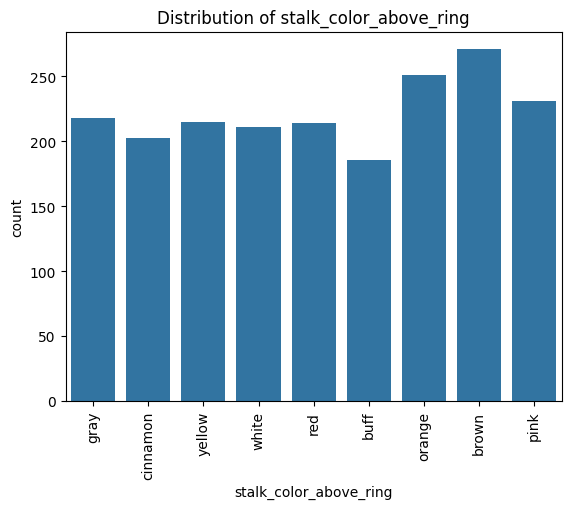

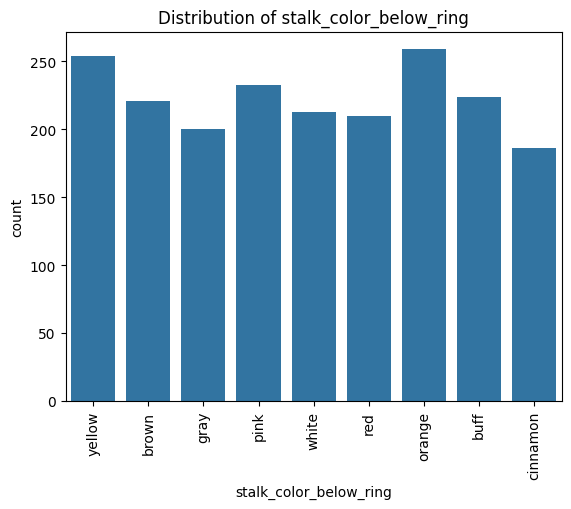

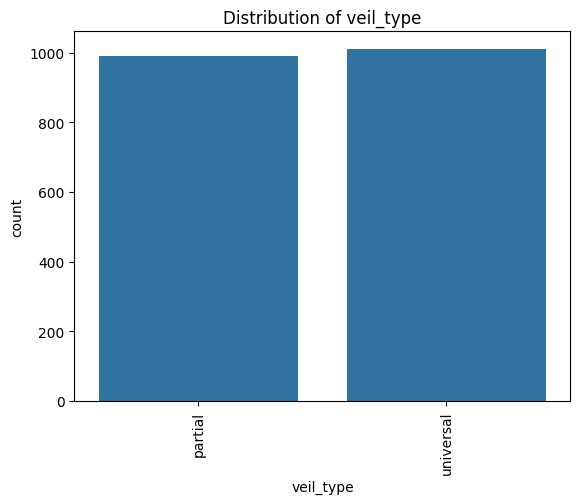

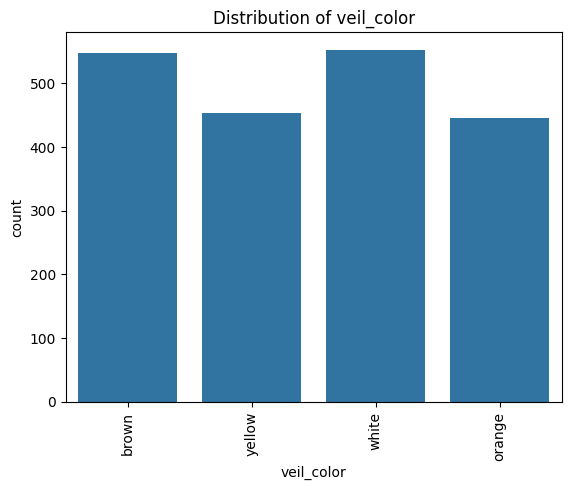

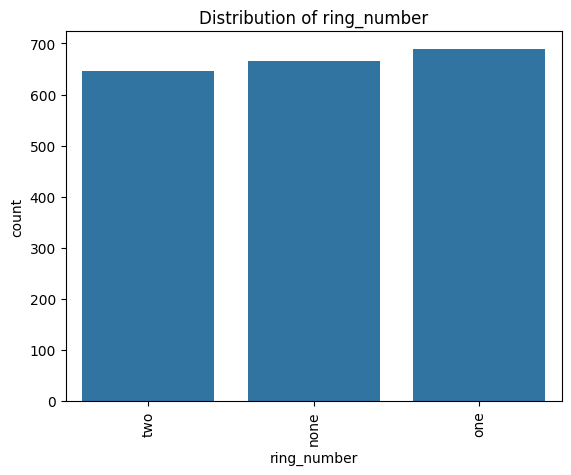

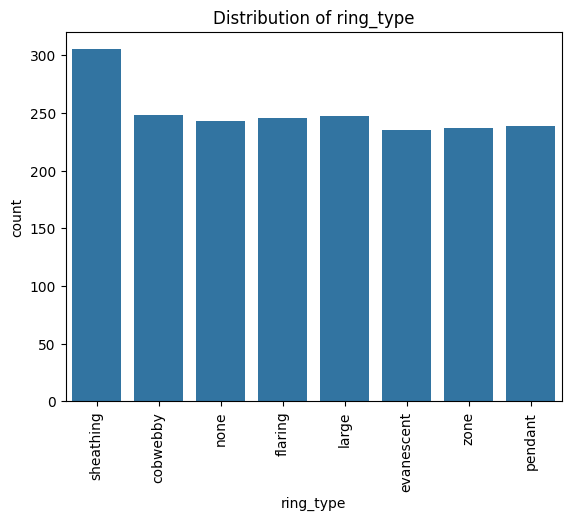

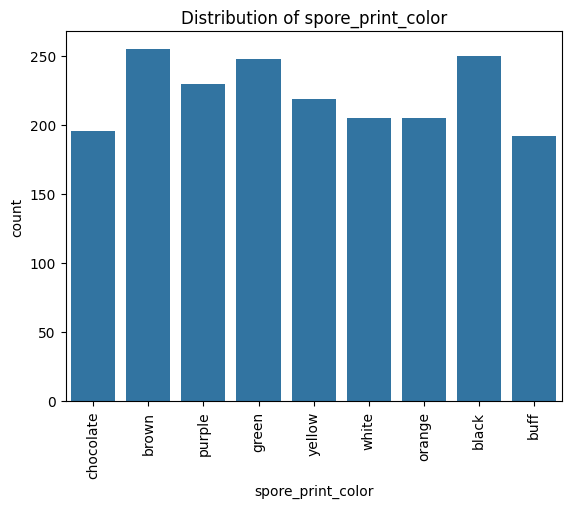

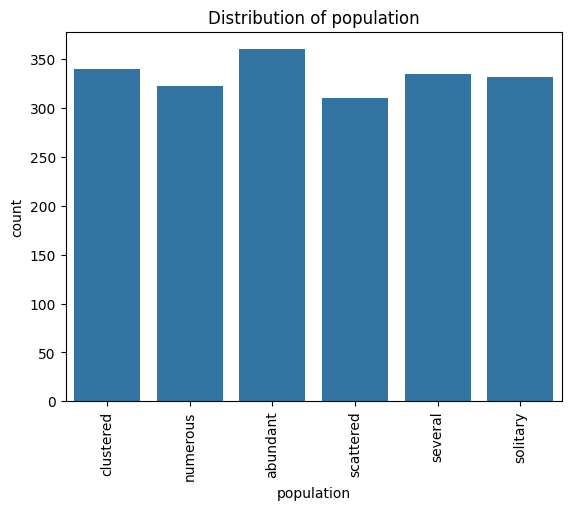

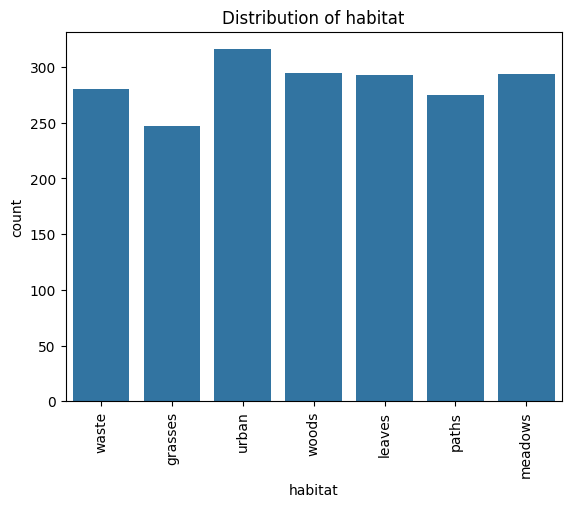

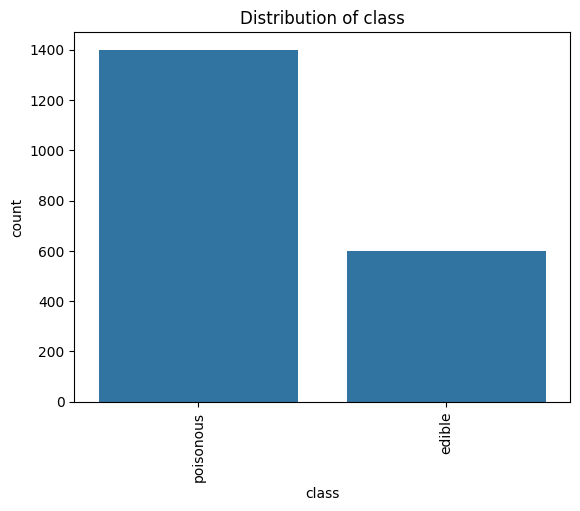

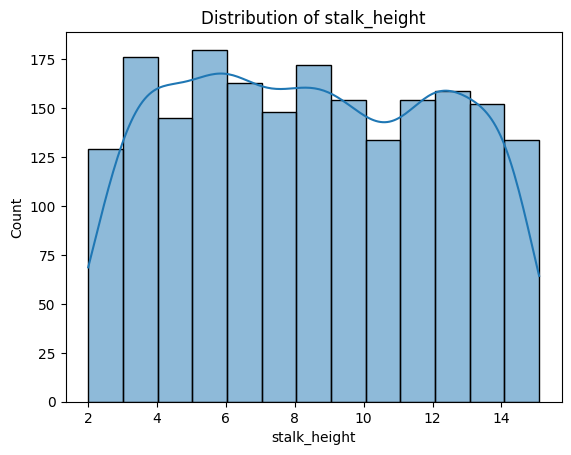

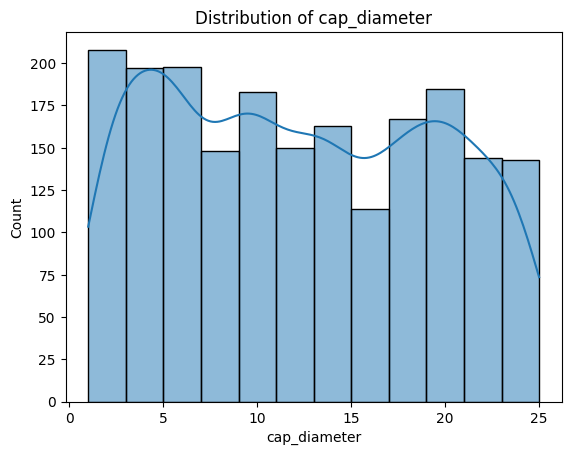

In [6]:
# Visualize feature distributions
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical feature
        sns.countplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()
    else:  # Numerical feature
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


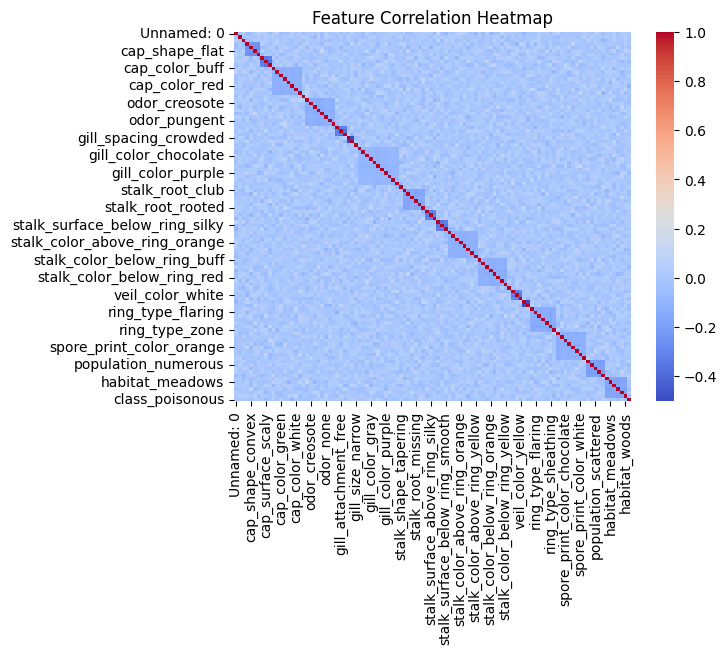

In [7]:
# Investigate feature correlations
# Encode categorical variables for correlation computation
encoded_df = pd.get_dummies(df, drop_first=True)
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

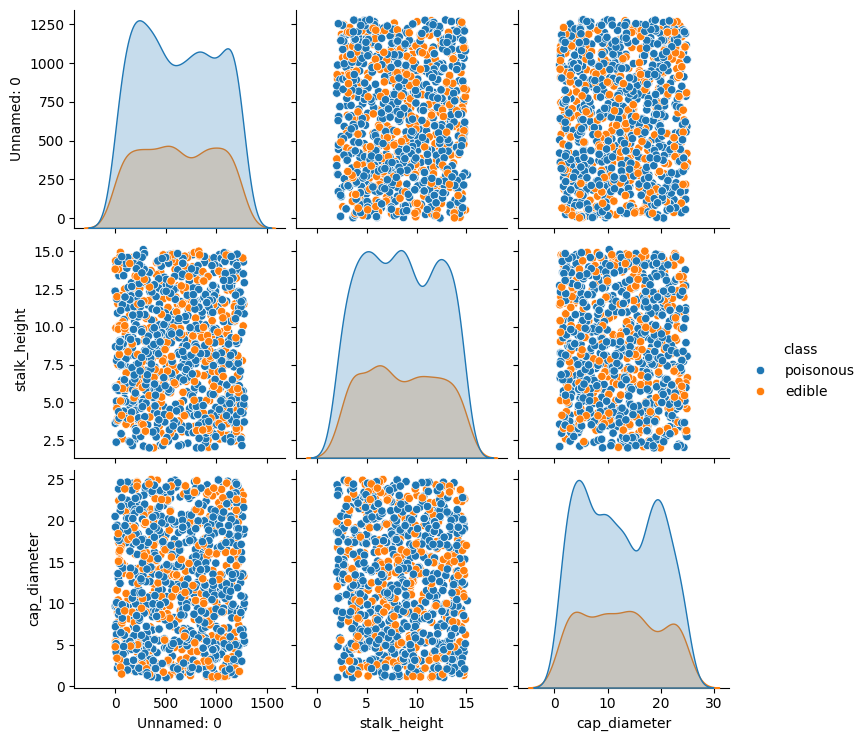

In [8]:
sns.pairplot(df, hue='class')

# Task 2: Data Preprocessing

In [9]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1037,3.952715,19.068319,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,309,9.054265,7.205884,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,282,5.226499,20.932692,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,820,14.037532,12.545245,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,5.877891,17.464145,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1996,1160,6.500840,13.501957,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1997,265,13.558064,11.270020,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
1998,411,11.092703,8.423199,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,True


In [10]:
# Split dataset into training and testing sets
features = df_encoded.drop('Unnamed: 0', axis=1)  # Replace 'class_e' with the target column
target = df_encoded['Unnamed: 0']
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 105)
(600, 105)
(1400,)
(600,)


# Task 3: Data Visualization

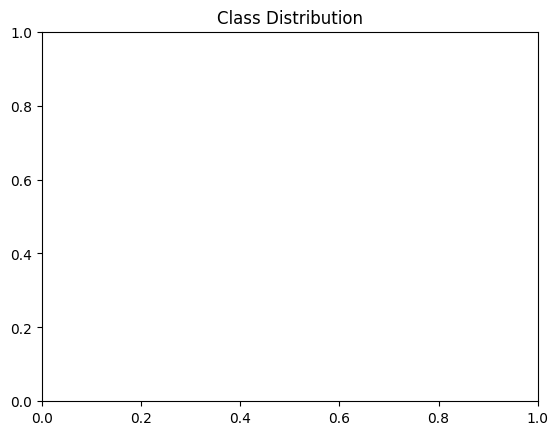

In [12]:
# Visualize class distributions
sns.countplot(features=target)
plt.title("Class Distribution")
plt.show()

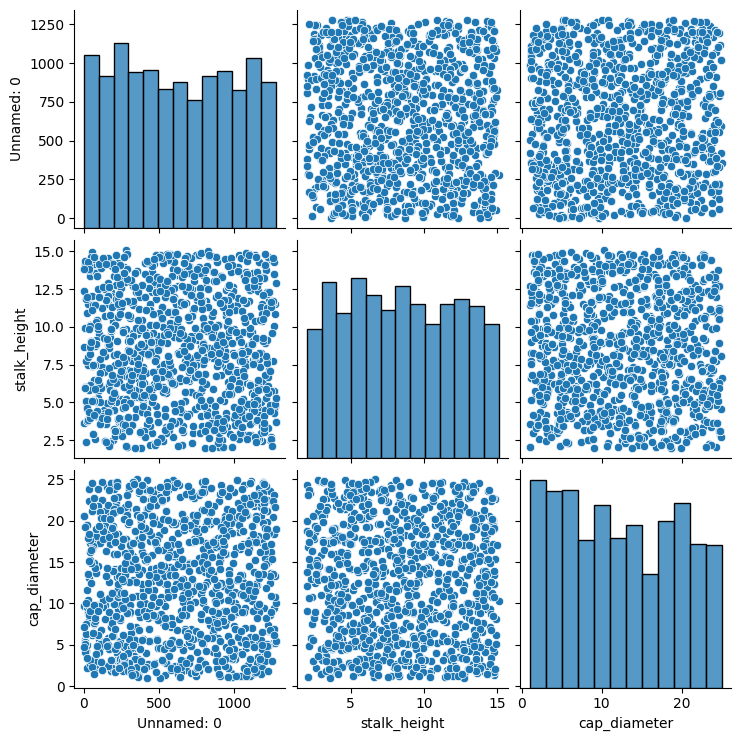

In [13]:
sns.pairplot(df)

# Task 4: SVM Implementation

In [14]:
# Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
# Evaluate model
y_pred = svm.predict(x_test)

In [16]:
classification_report(y_test, y_pred)

/Users/rushankpotadar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rushankpotadar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rushankpotadar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00         1\n           4       0.00      0.00      0.00         2\n           8       0.50      1.00      0.67         1\n           9       1.00      1.00      1.00         2\n          10       0.00      0.00      0.00         1\n          14       1.00      1.00      1.00         1\n          16       1.00      1.00      1.00         1\n          24       1.00      1.00      1.00         1\n          28       1.00      1.00      1.00         1\n          29       0.00      0.00      0.00         0\n          32       0.00      0.00      0.00         0\n          34       1.00      1.00      1.00         1\n          35       1.00      1.00      1.00         1\n          36       0.00      0.00      0.00         1\n          37       0.00      0.00      0.00         0\n          39       0.00      0.00      0.00         1\n       

In [17]:
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [18]:
accuracy_score(y_test, y_pred)

0.6966666666666667

# Task 5: Visualization of SVM Results

In [19]:
# Assuming 2D projection for simplicity
# PCA can be applied for dimensionality reduction if needed
from sklearn.decomposition import PCA

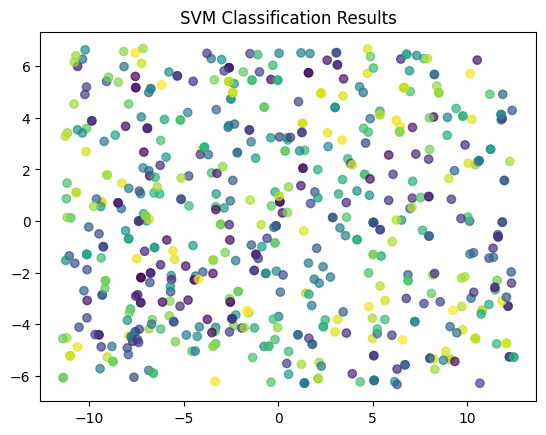

In [21]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_test)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.title("SVM Classification Results")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [22]:
# Experiment with different hyperparameters
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    print(f"Kernel: {kernel}")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

Kernel: linear
Accuracy Score: 0.6966666666666667
Kernel: poly
Accuracy Score: 0.15333333333333332
Kernel: rbf
Accuracy Score: 0.02


# Task 7: Comparison and Analysis

In [23]:
# Analyze performance for different kernels
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((kernel, acc))

In [24]:
acc

0.02

In [25]:
svm

SVC(random_state=42)

In [26]:
results_df = pd.DataFrame(results, columns=["Kernel", "Accuracy"])
results_df

,Kernel,Accuracy
0,linear,0.696667
1,poly,0.153333
2,rbf,0.020000


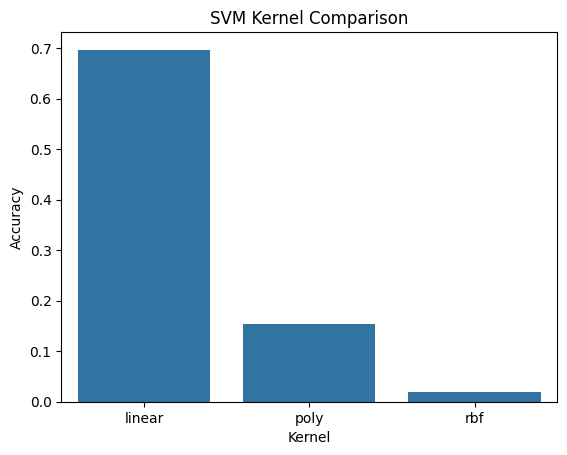

In [27]:
sns.barplot(data=results_df, x="Kernel", y="Accuracy")
plt.title("SVM Kernel Comparison")
plt.show()

### Discuss practical implications of SVM in real-world classification tasks

**Support Vector Machines (SVM)** are widely used in classification tasks due to their ability to handle high-dimensional data and find optimal decision boundaries. Below are some **practical applications** and **considerations** when using SVM in real-world scenarios.  

### **1. High-Dimensional Data Handling**  
**Use Case:** SVM is effective in text classification (e.g., spam detection, sentiment analysis) where data has thousands of features (e.g., word frequencies).  
**Explanation:** The algorithm performs well even when the number of dimensions (features) is larger than the number of samples.  


### **2. Small and Medium-Sized Datasets**  
**Use Case:** Medical diagnosis, fraud detection, and handwriting recognition.  
**Explanation:** SVM works well when the dataset is **not too large** but has clear distinctions between classes.  


### **3. Works Well with Non-Linearly Separable Data**  
**Use Case:** Image classification, face recognition, and anomaly detection.  
**Explanation:** The **kernel trick** allows SVM to map data into higher dimensions to separate classes more effectively.  


### **4. Computational Cost in Large Datasets**  
**Challenge:** SVM is computationally expensive for very large datasets.  
**Solution:** Use a **linear SVM (LinearSVC)** for large-scale problems or switch to **faster algorithms like Random Forest or Neural Networks** when needed.  


### **5. Robust to Outliers (with Proper Tuning)**  
**Use Case:** Credit card fraud detection, cyber threat detection.  
**Explanation:** The **soft margin** parameter (C) controls how much SVM tolerates misclassified points, balancing accuracy and robustness.  

    
### **6. Interpretability and Decision Boundaries**  
**Use Case:** Bioinformatics (e.g., cancer detection based on genetic data).  
**Explanation:** SVM provides a **clear decision boundary**, which is useful for understanding classifications in critical applications.  